## Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, f_oneway

## Dataset

In [2]:
data = pd.read_csv("NEW_OFFICIAL_cleaned_data_without_outliers.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0


## Feature Engineering

Number of Bedrooms - categories
- 0
- 1
- 2-3
- 4-5
- more than 5

In [3]:
def categorize_bedroom2(value):
    if value == 0:
        return 'Group_0'
    elif value == 1:
        return 'Group_1'
    elif value in [2, 3]:
        return 'Group_2_3'
    elif value in [4, 5]:
        return 'Group_4_5'
    else:
        return 'Group_6_or_more'

data['Bedroom2_Group'] = data['Bedroom2'].apply(categorize_bedroom2)

data = pd.get_dummies(data, columns=['Bedroom2_Group'], prefix='Bedroom2', drop_first=False)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False


Number of Rooms - for >= 6, set 6

In [4]:
data['Rooms'] = data['Rooms'].apply(lambda x: 6 if x >= 6 else x)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False


Car - categories
- 0
- 1
- 2
- 3 - 4
- more than 4

In [5]:
def categorize_car_direct(value):
    if value == 0:
        return 0
    elif value == 1:
        return 1
    elif value == 2:
        return 2
    elif value in [3, 4]:
        return 3
    else:
        return 4

# Apply the direct mapping to create a new categorical column
data['Car_Category'] = data['Car'].apply(categorize_car_direct)

# Create dummies using this numerical mapping
car_dummies = pd.get_dummies(data['Car_Category'], prefix='Car', drop_first=False)

data = pd.concat([data, car_dummies], axis=1)

data.head()



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_Category,Car_0,Car_1,Car_2,Car_3,Car_4
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False,2,False,False,True,False,False


Bathrooms - for >=4, set 4

In [6]:
data['Bathroom'] = data['Bathroom'].apply(lambda x: 4 if x >= 4 else x)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_Category,Car_0,Car_1,Car_2,Car_3,Car_4
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False,2,False,False,True,False,False


YearSold

In [7]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [8]:
data['YearSold'] = data['Date'].dt.year
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_Category,Car_0,Car_1,Car_2,Car_3,Car_4,YearSold
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False,2,False,False,True,False,False,2016


HouseAge

In [9]:
data['HouseAge'] = data['YearSold'] - data['YearBuilt']

Grouping by Regionname - based on Average Housing Prices by Region Map

In [10]:
region_groups = {
    'Northern Metropolitan': 'N_S_SE_Metropolitan',
    'Southern Metropolitan': 'N_S_SE_Metropolitan',
    'South-Eastern Metropolitan': 'N_S_SE_Metropolitan',
    'Eastern Metropolitan': 'E_Metropolitan',
    'Western Metropolitan': 'W_Metropolitan',
    'Western Victoria': 'W_N_E_Victoria',
    'Northern Victoria': 'W_N_E_Victoria',
    'Eastern Victoria': 'W_N_E_Victoria'
}

# Map the 'Regionname' column to the new region groups
data['RegionGroup'] = data['Regionname'].map(region_groups)

# Create dummy variables for the new RegionGroup
data = pd.get_dummies(data, columns=['RegionGroup'], drop_first=False)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_Category,Car_0,Car_1,Car_2,Car_3,Car_4,YearSold,HouseAge,RegionGroup_E_Metropolitan,RegionGroup_N_S_SE_Metropolitan,RegionGroup_W_Metropolitan,RegionGroup_W_N_E_Victoria
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2016,66,False,True,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2016,116,False,True,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2017,117,False,True,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2017,57,False,True,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False,2,False,False,True,False,False,2016,2,False,True,False,False


Method - dummy

In [11]:
data = pd.get_dummies(data, columns=['Method'], prefix='Method', drop_first=False)
data.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_Category,Car_0,Car_1,Car_2,Car_3,Car_4,YearSold,HouseAge,RegionGroup_E_Metropolitan,RegionGroup_N_S_SE_Metropolitan,RegionGroup_W_Metropolitan,RegionGroup_W_N_E_Victoria,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2016,66,False,True,False,False,False,True,False,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2016,116,False,True,False,False,False,True,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2017,117,False,True,False,False,False,False,False,True,False
3,Abbotsford,40 Federation La,3,h,850000.0,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2017,57,False,True,False,False,True,False,False,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False,2,False,False,True,False,False,2016,2,False,True,False,False,False,False,False,False,True


**Type** - creating dummies

h- house,cottage,villa, semi,terrace; u- unit, duplex; t- townhouse 

In [12]:
type_dummies = pd.get_dummies(data['Type'], prefix='Type', drop_first=False)

data = pd.concat([data, type_dummies], axis=1)

data.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_Category,Car_0,Car_1,Car_2,Car_3,Car_4,YearSold,HouseAge,RegionGroup_E_Metropolitan,RegionGroup_N_S_SE_Metropolitan,RegionGroup_W_Metropolitan,RegionGroup_W_N_E_Victoria,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Type_h,Type_t,Type_u
0,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2016,66,False,True,False,False,False,True,False,False,False,True,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2016,116,False,True,False,False,False,True,False,False,False,True,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2017,117,False,True,False,False,False,False,False,True,False,True,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2017,57,False,True,False,False,True,False,False,False,False,True,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False,2,False,False,True,False,False,2016,2,False,True,False,False,False,False,False,False,True,True,False,False


## Creating a new dataset file with new features

In [13]:
data.to_csv('After_feature_engineering.csv', index=False)

In [14]:
new_dataset = pd.read_csv("After_feature_engineering.csv")
new_dataset.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,BuildingArea_missing,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_Category,Car_0,Car_1,Car_2,Car_3,Car_4,YearSold,HouseAge,RegionGroup_E_Metropolitan,RegionGroup_N_S_SE_Metropolitan,RegionGroup_W_Metropolitan,RegionGroup_W_N_E_Victoria,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Type_h,Type_t,Type_u
0,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,120.320408,1950,-37.7996,144.9984,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2016,66,False,True,False,False,False,True,False,False,False,True,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,79.000000,1900,-37.8079,144.9934,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2016,116,False,True,False,False,False,True,False,False,False,True,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,150.000000,1900,-37.8093,144.9944,Northern Metropolitan,4019,0,False,False,True,False,False,0,True,False,False,False,False,2017,117,False,True,False,False,False,False,False,True,False,True,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,97.551020,1960,-37.7969,144.9969,Northern Metropolitan,4019,1,False,False,True,False,False,1,False,True,False,False,False,2017,57,False,True,False,False,True,False,False,False,False,True,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,142.000000,2014,-37.8072,144.9941,Northern Metropolitan,4019,0,False,False,True,False,False,2,False,False,True,False,False,2016,2,False,True,False,False,False,False,False,False,True,True,False,False


## Dropping unnecessary columns for the analysis

In [17]:
columns_to_drop = ['Suburb', 'Address', 'SellerG', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'Type', 'Bedroom2', 'Car', 'Regionname', 'YearBuilt', 'Car_Category','BuildingArea_missing']
new_dataset = new_dataset.drop(columns=columns_to_drop, errors='ignore')

new_dataset.head()

,Rooms,Price,Distance,Bathroom,Landsize,BuildingArea,Propertycount,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_0,Car_1,Car_2,Car_3,Car_4,YearSold,HouseAge,RegionGroup_E_Metropolitan,RegionGroup_N_S_SE_Metropolitan,RegionGroup_W_Metropolitan,RegionGroup_W_N_E_Victoria,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Type_h,Type_t,Type_u
0,2,1480000.0,2.5,1,202.0,120.320408,4019,False,False,True,False,False,False,True,False,False,False,2016,66,False,True,False,False,False,True,False,False,False,True,False,False
1,2,1035000.0,2.5,1,156.0,79.000000,4019,False,False,True,False,False,True,False,False,False,False,2016,116,False,True,False,False,False,True,False,False,False,True,False,False
2,3,1465000.0,2.5,2,134.0,150.000000,4019,False,False,True,False,False,True,False,False,False,False,2017,117,False,True,False,False,False,False,False,True,False,True,False,False
3,3,850000.0,2.5,2,94.0,97.551020,4019,False,False,True,False,False,False,True,False,False,False,2017,57,False,True,False,False,True,False,False,False,False,True,False,False
4,4,1600000.0,2.5,1,120.0,142.000000,4019,False,False,True,False,False,False,False,True,False,False,2016,2,False,True,False,False,False,False,False,False,True,True,False,False


## Correlations

##### Numerical vs Numerical

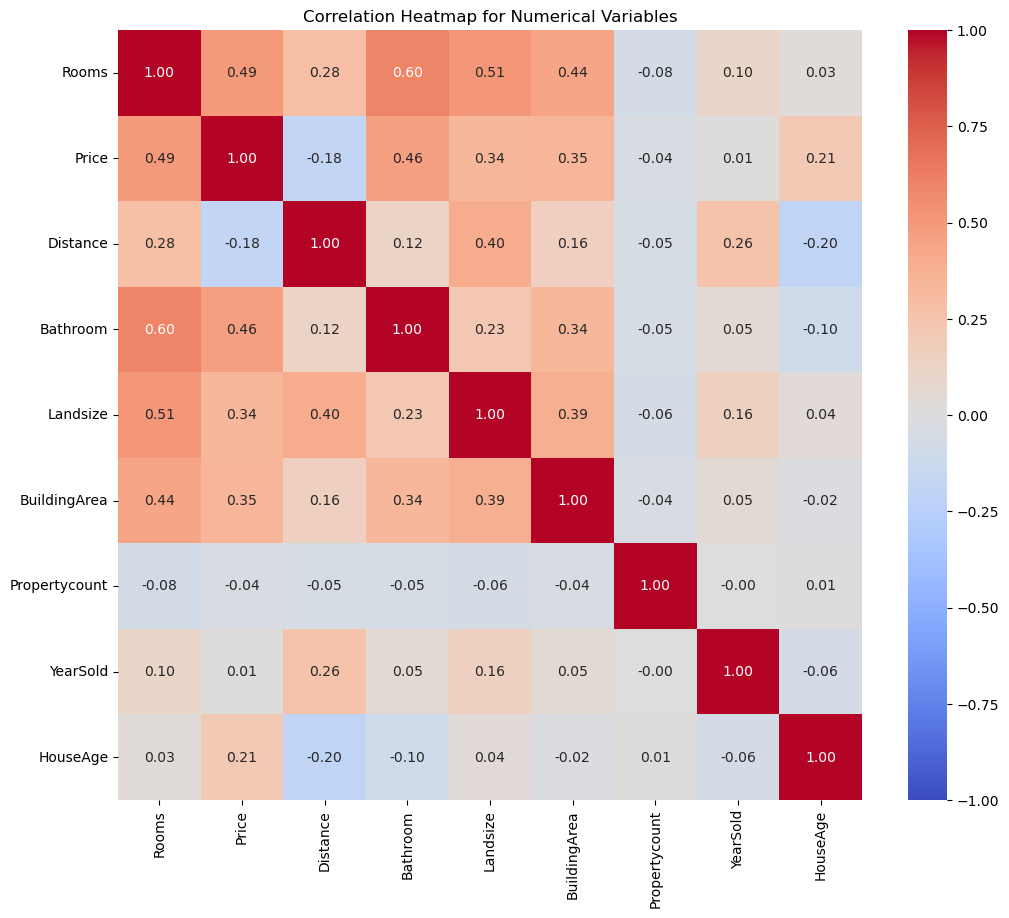

In [18]:
numerical_cols = new_dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = new_dataset[numerical_cols].corr()

# Heatmap of numerical correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

In [20]:
high_corr_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.5
]
high_corr_pairs=pd.DataFrame(high_corr_pairs)
high_corr_pairs

,0,1,2
0,Rooms,Bathroom,0.595573
1,Rooms,Landsize,0.509608
2,Bathroom,Rooms,0.595573
3,Landsize,Rooms,0.509608


##### Categorical vs Categorical

In [21]:
categorical_cols = new_dataset.select_dtypes(include=["object", "category"]).columns


categorical_corr_optimized = {}
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(new_dataset[col1], new_dataset[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table, correction=False)
            if p < 0.05:
                categorical_corr_optimized[(col1, col2)] = p

categorical_corr_optimized

{}

##### Numerical vs Categorical

In [22]:
categorical_vs_numerical_corr_optimized = {}
for cat_col in categorical_cols:
    unique_values = new_dataset[cat_col].nunique()
    if unique_values <= 10: 
        for num_col in numerical_cols:
            anova_p = f_oneway(
                *[new_dataset[new_dataset[cat_col] == category][num_col].dropna()
                  for category in new_dataset[cat_col].unique()]
            ).pvalue
            if anova_p < 0.05:
                categorical_vs_numerical_corr_optimized[(cat_col, num_col)] = anova_p

categorical_vs_numerical_corr_optimized

{}

## Training and Test Set

In [23]:
train_data = new_dataset[new_dataset['YearSold'] == 2016]
test_data = new_dataset[new_dataset['YearSold'] == 2017]

## Dropping unnecessary column - YearSold

In [24]:
columns_to_drop = ['YearSold']
new_dataset = new_dataset.drop(columns=columns_to_drop, errors='ignore')

new_dataset.head()

,Rooms,Price,Distance,Bathroom,Landsize,BuildingArea,Propertycount,Bedroom2_Group_0,Bedroom2_Group_1,Bedroom2_Group_2_3,Bedroom2_Group_4_5,Bedroom2_Group_6_or_more,Car_0,Car_1,Car_2,Car_3,Car_4,HouseAge,RegionGroup_E_Metropolitan,RegionGroup_N_S_SE_Metropolitan,RegionGroup_W_Metropolitan,RegionGroup_W_N_E_Victoria,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Type_h,Type_t,Type_u
0,2,1480000.0,2.5,1,202.0,120.320408,4019,False,False,True,False,False,False,True,False,False,False,66,False,True,False,False,False,True,False,False,False,True,False,False
1,2,1035000.0,2.5,1,156.0,79.000000,4019,False,False,True,False,False,True,False,False,False,False,116,False,True,False,False,False,True,False,False,False,True,False,False
2,3,1465000.0,2.5,2,134.0,150.000000,4019,False,False,True,False,False,True,False,False,False,False,117,False,True,False,False,False,False,False,True,False,True,False,False
3,3,850000.0,2.5,2,94.0,97.551020,4019,False,False,True,False,False,False,True,False,False,False,57,False,True,False,False,True,False,False,False,False,True,False,False
4,4,1600000.0,2.5,1,120.0,142.000000,4019,False,False,True,False,False,False,False,True,False,False,2,False,True,False,False,False,False,False,False,True,True,False,False


## Metrics

In [25]:
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE'])

## Model 1 - basic features

Training

In [1293]:
model = smf.ols('Price ~ Distance + Bathroom + BuildingArea + HouseAge', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1187.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:37   Log-Likelihood:                -90296.
No. Observations:                6225   AIC:                         1.806e+05
Df Residuals:                    6220   BIC:                         1.806e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.404e+05   2.36e+04      5.937   

Test

In [1294]:
model_name = "Model 1"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 527914.5701986082
Mean Absolute Error: 335634.22139692464


C:\Users\lasko\AppData\Local\Temp\ipykernel_31128\957269323.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397


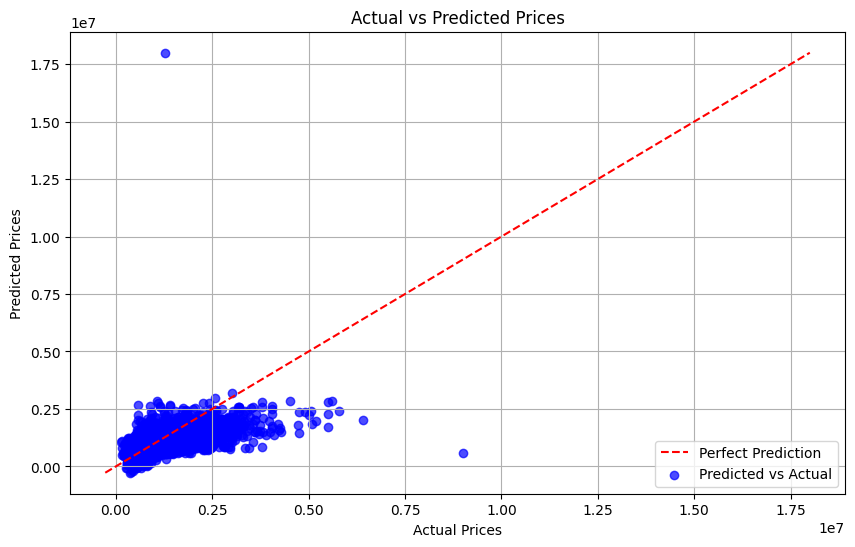

In [1295]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

##### HELPER FUNCTION - NAMES OF ALL THE COLUMNS

In [1296]:
concatenated_columns = ' + '.join([col for col in new_dataset.columns if col != 'Price'])
concatenated_columns

'Rooms + Distance + Bathroom + Landsize + BuildingArea + Propertycount + Bedroom2_Group_0 + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Car_0 + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + RegionGroup_E_Metropolitan + RegionGroup_N_S_SE_Metropolitan + RegionGroup_W_Metropolitan + RegionGroup_W_N_E_Victoria + Method_PI + Method_S + Method_SA + Method_SP + Method_VB + Type_h + Type_t + Type_u'

## Multicollinearity
Choosing dummies as a benchmark to exclude from the model
- RegionGroup_W_N_E_Victoria
- Bedroom2_Group_0
- Car_0
- Method_S
- Type_h

## Model 2 - all features, no interactions

Training

In [1297]:
model = smf.ols('Price ~ Rooms + Distance + Bathroom + Landsize + BuildingArea + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + RegionGroup_E_Metropolitan + RegionGroup_N_S_SE_Metropolitan + RegionGroup_W_Metropolitan + Method_PI + Method_SA + Method_SP + Method_VB + Type_t + Type_u', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     394.2
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:38   Log-Likelihood:                -89338.
No. Observations:                6225   AIC:                         1.787e+05
Df Residuals:                    6202   BIC:                         1.789e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Test

In [1298]:
model_name = "Model 2"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 453177.0408647971
Mean Absolute Error: 315777.48225494364


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397
1,Model 2,2.053694e+11,453177.040865,315777.482255


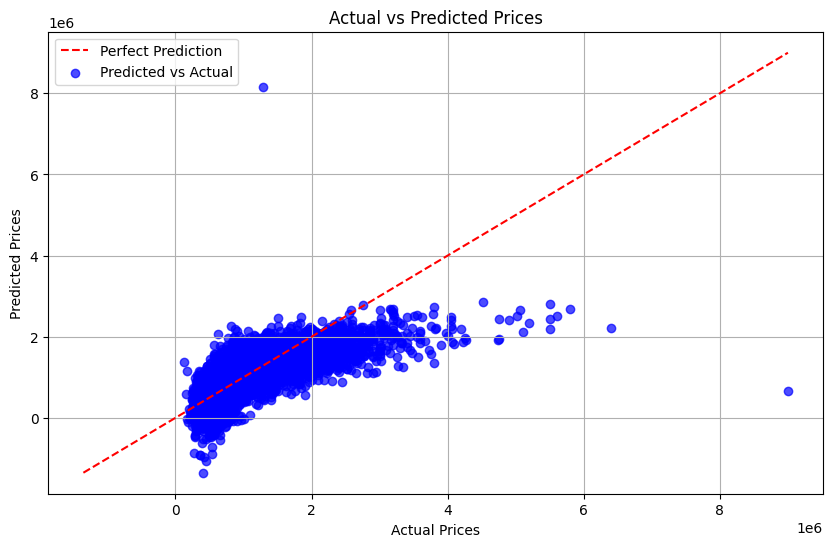

In [1299]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## Ideas for interactions
- Rooms * BuildingArea
- BuildingArea * RegionGroup
- Type * RegionGroup
- Method * RegionGroup

## Model 3 - all features, with interactions
- BuildingArea * RegionGroup

Training

In [1300]:
model = smf.ols('Price ~ Rooms + Distance + Bathroom + Landsize + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + BuildingArea*RegionGroup_E_Metropolitan + BuildingArea*RegionGroup_N_S_SE_Metropolitan + BuildingArea*RegionGroup_W_Metropolitan + Method_PI + Method_SA + Method_SP + Method_VB + Type_t + Type_u', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     371.9
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:38   Log-Likelihood:                -89285.
No. Observations:                6225   AIC:                         1.786e+05
Df Residuals:                    6200   BIC:                         1.788e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Test

In [1301]:
model_name = "Model 3"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 444700.58554075065
Mean Absolute Error: 313349.9221569042


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397
1,Model 2,2.053694e+11,453177.040865,315777.482255
2,Model 3,1.977586e+11,444700.585541,313349.922157


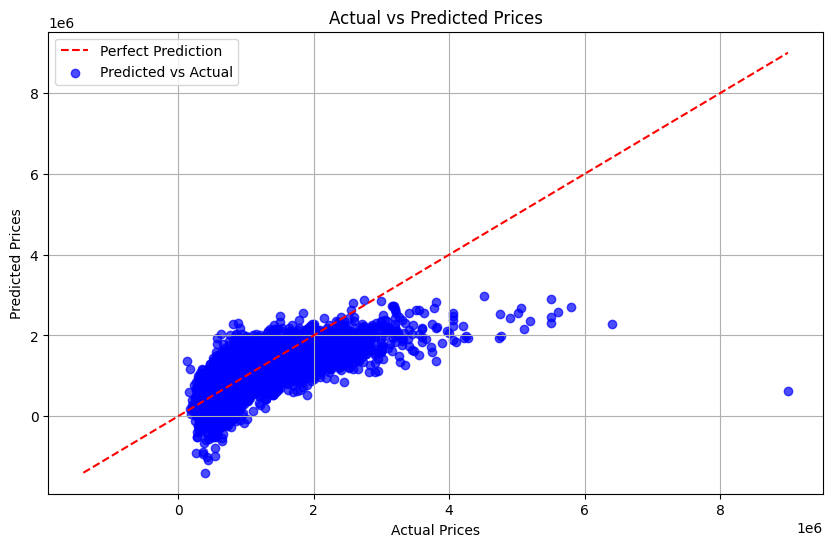

In [1302]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## Model 4 - all features, with interactions
- BuildingArea * RegionGroup
- Rooms * BuildingArea

Training

In [1303]:
model = smf.ols('Price ~ Distance + Bathroom + Landsize + Rooms*BuildingArea + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + BuildingArea*RegionGroup_E_Metropolitan + BuildingArea*RegionGroup_N_S_SE_Metropolitan + BuildingArea*RegionGroup_W_Metropolitan + Method_PI + Method_SA + Method_SP + Method_VB + Type_t + Type_u', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     357.3
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:38   Log-Likelihood:                -89284.
No. Observations:                6225   AIC:                         1.786e+05
Df Residuals:                    6199   BIC:                         1.788e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Test

In [1304]:
model_name = "Model 4"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 444477.71110379184
Mean Absolute Error: 313331.5183022104


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397
1,Model 2,2.053694e+11,453177.040865,315777.482255
2,Model 3,1.977586e+11,444700.585541,313349.922157
3,Model 4,1.975604e+11,444477.711104,313331.518302


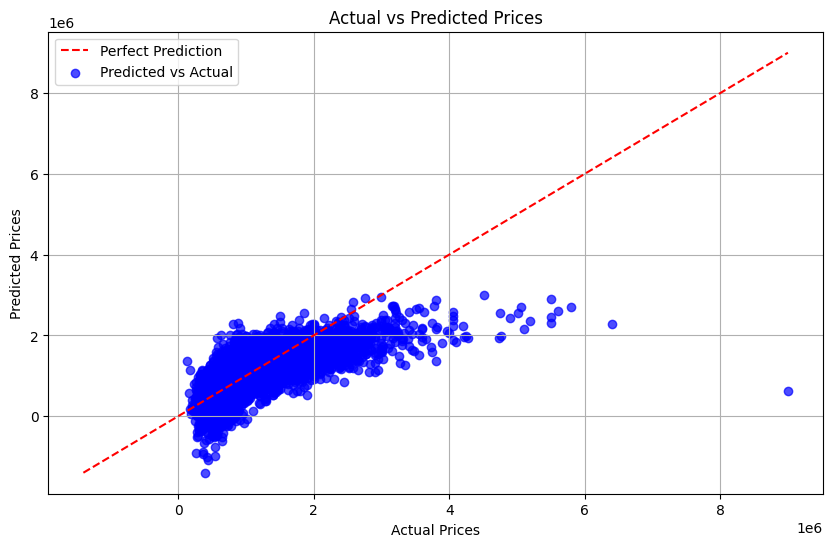

In [1305]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## Model 5 - all features, with interactions
- BuildingArea * RegionGroup
- Type * RegionGroup

Training

In [1306]:
model = smf.ols('Price ~ Distance + Bathroom + Landsize + Rooms + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + BuildingArea*RegionGroup_E_Metropolitan + BuildingArea*RegionGroup_N_S_SE_Metropolitan + BuildingArea*RegionGroup_W_Metropolitan + Type_t*RegionGroup_E_Metropolitan + Type_t*RegionGroup_N_S_SE_Metropolitan + Type_t*RegionGroup_W_Metropolitan + Type_u*RegionGroup_E_Metropolitan + Type_u*RegionGroup_N_S_SE_Metropolitan + Type_u*RegionGroup_W_Metropolitan +Method_PI + Method_SA + Method_SP + Method_VB', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     323.5
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:38   Log-Likelihood:                -89257.
No. Observations:                6225   AIC:                         1.786e+05
Df Residuals:                    6196   BIC:                         1.788e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Test

In [1307]:
model_name = "Model 5"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 445108.4958342022
Mean Absolute Error: 313353.6172887406


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397
1,Model 2,2.053694e+11,453177.040865,315777.482255
2,Model 3,1.977586e+11,444700.585541,313349.922157
3,Model 4,1.975604e+11,444477.711104,313331.518302
4,Model 5,1.981216e+11,445108.495834,313353.617289


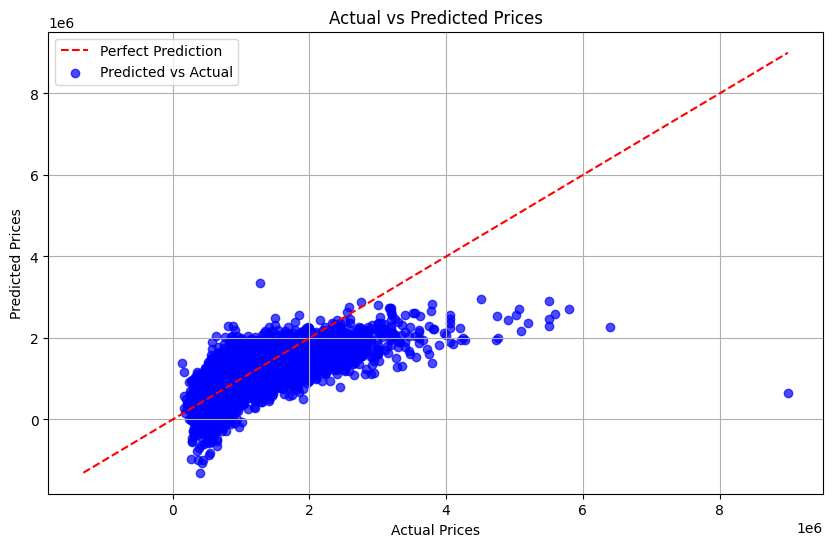

In [1308]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## Model 6 - all features, with interactions
- BuildingArea * RegionGroup
- Type * RegionGroup
- Bathroom * Bedroom2_Group

Training

In [1309]:
model = smf.ols('Price ~ Distance + Landsize + Rooms + Bathroom*Bedroom2_Group_1 + Bathroom*Bedroom2_Group_2_3 + Bathroom*Bedroom2_Group_4_5 + Bathroom*Bedroom2_Group_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + BuildingArea*RegionGroup_E_Metropolitan + BuildingArea*RegionGroup_N_S_SE_Metropolitan + BuildingArea*RegionGroup_W_Metropolitan + Type_t*RegionGroup_E_Metropolitan + Type_t*RegionGroup_N_S_SE_Metropolitan + Type_t*RegionGroup_W_Metropolitan + Type_u*RegionGroup_E_Metropolitan + Type_u*RegionGroup_N_S_SE_Metropolitan + Type_u*RegionGroup_W_Metropolitan +Method_PI + Method_SA + Method_SP + Method_VB', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     287.0
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:39   Log-Likelihood:                -89230.
No. Observations:                6225   AIC:                         1.785e+05
Df Residuals:                    6192   BIC:                         1.787e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Test

In [1310]:
model_name = "Model 6"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 445476.568404045
Mean Absolute Error: 313668.52438617684


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397
1,Model 2,2.053694e+11,453177.040865,315777.482255
2,Model 3,1.977586e+11,444700.585541,313349.922157
3,Model 4,1.975604e+11,444477.711104,313331.518302
4,Model 5,1.981216e+11,445108.495834,313353.617289
5,Model 6,1.984494e+11,445476.568404,313668.524386


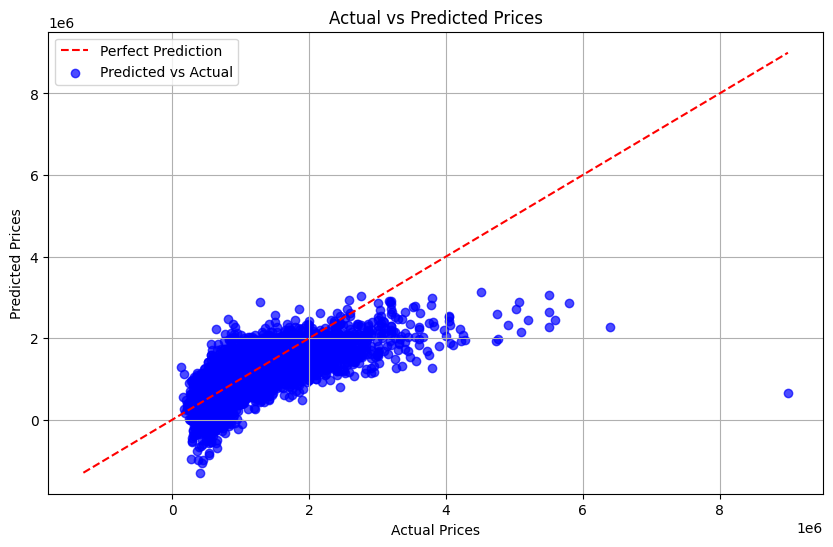

In [1311]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## Model 7 - all features, with interactions - MORE INTERPRETABLE INTERACTONS
- BuildingArea * RegionGroup
- Bathroom * Bedroom2_Group

Training

In [1312]:
model = smf.ols('Price ~ Distance + Landsize + Rooms + Bathroom*Bedroom2_Group_1 + Bathroom*Bedroom2_Group_2_3 + Bathroom*Bedroom2_Group_4_5 + Bathroom*Bedroom2_Group_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + BuildingArea*RegionGroup_E_Metropolitan + BuildingArea*RegionGroup_N_S_SE_Metropolitan + BuildingArea*RegionGroup_W_Metropolitan + Type_t + Type_u + Method_PI + Method_SA + Method_SP + Method_VB', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     323.3
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:39   Log-Likelihood:                -89258.
No. Observations:                6225   AIC:                         1.786e+05
Df Residuals:                    6196   BIC:                         1.788e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Test

In [1313]:
model_name = "Model 7"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 445483.7497254412
Mean Absolute Error: 313773.92744164245


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397
1,Model 2,2.053694e+11,453177.040865,315777.482255
2,Model 3,1.977586e+11,444700.585541,313349.922157
3,Model 4,1.975604e+11,444477.711104,313331.518302
4,Model 5,1.981216e+11,445108.495834,313353.617289
5,Model 6,1.984494e+11,445476.568404,313668.524386
6,Model 7,1.984558e+11,445483.749725,313773.927442


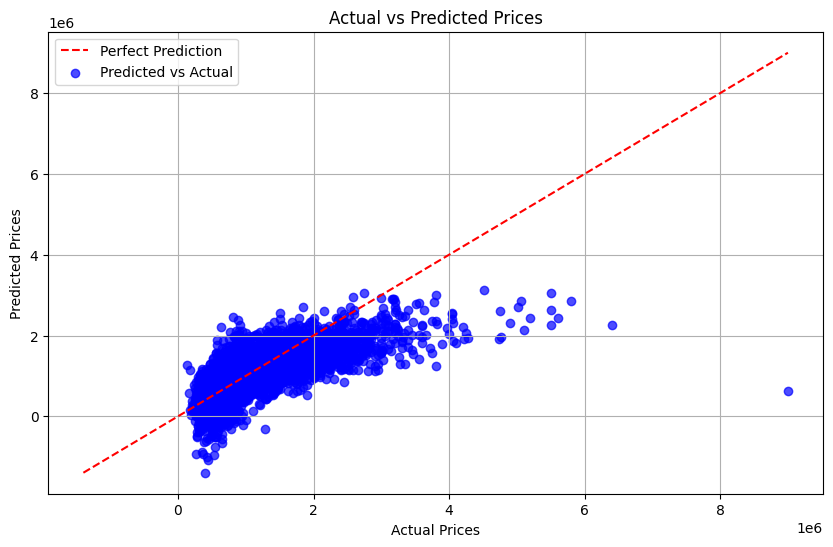

In [1314]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## Model 8  - all features, with interactions - MORE INTERPRETABLE INTERACTONS
- BuildingArea * RegionGroup
- Method * RegionGroup

Training

In [1315]:
model = smf.ols('Price ~ Distance + Landsize + Rooms + Bathroom + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + HouseAge + BuildingArea*RegionGroup_E_Metropolitan + BuildingArea*RegionGroup_N_S_SE_Metropolitan + BuildingArea*RegionGroup_W_Metropolitan + Type_t + Type_u + RegionGroup_W_Metropolitan*Method_PI + RegionGroup_W_Metropolitan*Method_SA + RegionGroup_W_Metropolitan*Method_SP + RegionGroup_W_Metropolitan*Method_VB + RegionGroup_N_S_SE_Metropolitan*Method_PI + RegionGroup_N_S_SE_Metropolitan*Method_SA + RegionGroup_N_S_SE_Metropolitan*Method_SP + RegionGroup_N_S_SE_Metropolitan*Method_VB + RegionGroup_E_Metropolitan*Method_PI + RegionGroup_E_Metropolitan*Method_SA + RegionGroup_E_Metropolitan*Method_SP + RegionGroup_E_Metropolitan*Method_VB', train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     288.4
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:41:39   Log-Likelihood:                -89280.
No. Observations:                6225   AIC:                         1.786e+05
Df Residuals:                    6193   BIC:                         1.788e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Test

In [1316]:
model_name = "Model 8"
predictions = model.predict(test_data)
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 444451.6773870593
Mean Absolute Error: 313183.69471564575


,Model,MSE,RMSE,MAE
0,Model 1,2.786938e+11,527914.570199,335634.221397
1,Model 2,2.053694e+11,453177.040865,315777.482255
2,Model 3,1.977586e+11,444700.585541,313349.922157
3,Model 4,1.975604e+11,444477.711104,313331.518302
4,Model 5,1.981216e+11,445108.495834,313353.617289
5,Model 6,1.984494e+11,445476.568404,313668.524386
6,Model 7,1.984558e+11,445483.749725,313773.927442
7,Model 8,1.975373e+11,444451.677387,313183.694716


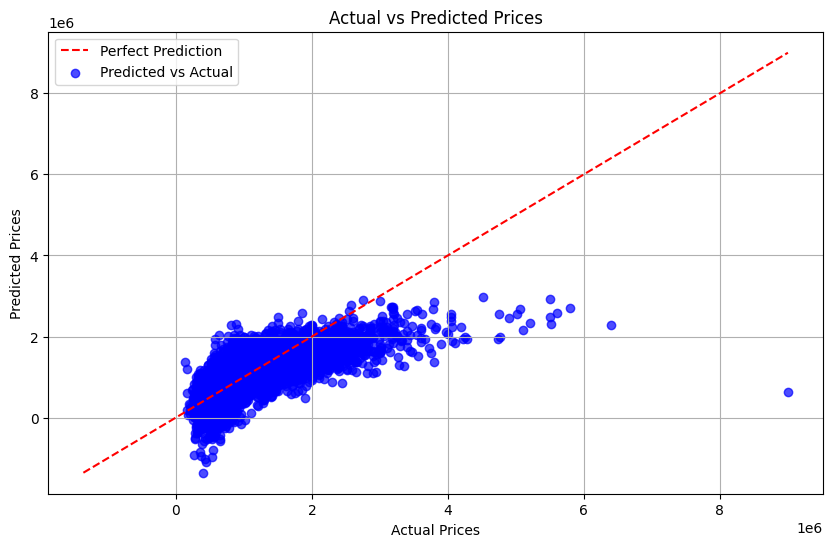

In [1317]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_data['Price']), max(predictions))
min_price = min(min(test_data['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_data['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## Models Comparison - metrics

In [1318]:
metrics_df[['MSE', 'RMSE', 'MAE']] = metrics_df[['MSE', 'RMSE', 'MAE']].round(2)
sorted_metrics_df = metrics_df[['Model', 'RMSE']].sort_values(by='RMSE', ascending=False)
sorted_metrics_df

,Model,RMSE
0,Model 1,527914.57
1,Model 2,453177.04
6,Model 7,445483.75
5,Model 6,445476.57
4,Model 5,445108.50
2,Model 3,444700.59
3,Model 4,444477.71
7,Model 8,444451.68
